In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is the list of all the files present in the path given to us:

['accelgor.png', 'altaria.png', 'ambipom.png', 'absol.png', 'abomasnow.png', 'aggron.png', 'alomomola.png', 'aegislash-blade.png', 'abra.png', 'alakazam.png', 'aerodactyl.png', 'aipom.png', 'amaura.png', 'beldum.png', 'arceus.png', 'beautifly.png', 'baltoy.png', 'chespin.png', 'blacephalon.jpg', 'aromatisse.png', 'budew.png', 'anorith.png', 'blastoise.png', 'ampharos.png', 'chesnaught.png', 'bellsprout.png', 'buzzwole.jpg', 'charjabug.jpg', 'bidoof.png', 'chatot.png', 'clawitzer.png', 'carracosta.png', 'blissey.png', 'bastiodon.png', 'aron.png', 'bunnelby.png', 'bewear.jpg', 'chikorita.png', 'cinccino.png', 'bouffalant.png', 'chimchar.png', 'cacturne.png', 'ariados.png', 'combee.png', 'clauncher.png', 'cobalion.png', 'charmander.png', 'combusken.png', 'arbok.png', 'carnivine.png', 'chandelure.png', 'camerupt.png', 'avalugg.png', 'chimecho.png', 'clamperl.png', 'beedrill.png', 'celebi.png', 'butterfree.png', 'blitzle.pn

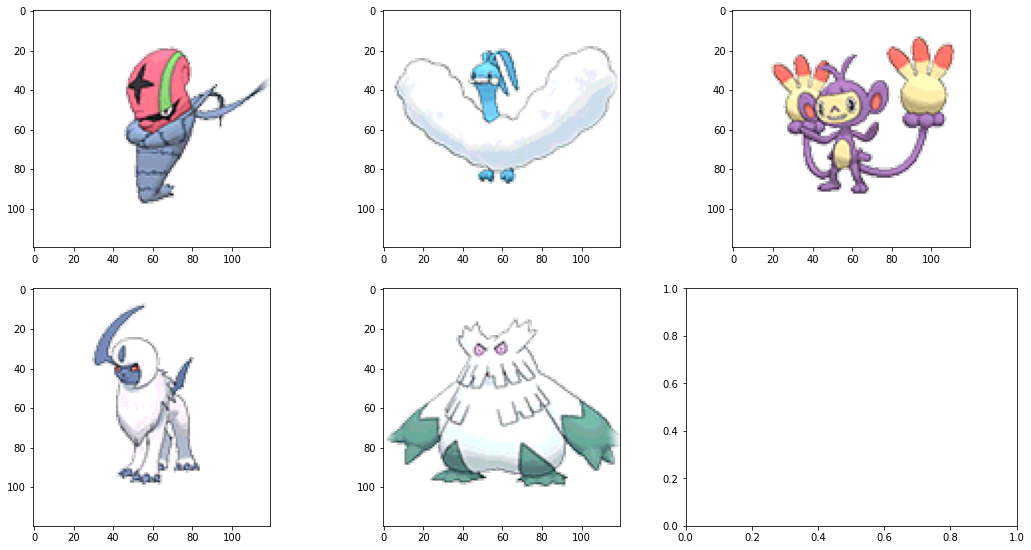

In [3]:
# defining root directory
from PIL import Image

root_dir = "../content/drive/MyDrive/AIoT_DS/final/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()

In [4]:
## Run the below cells as it is
data = pd.read_csv("../content/drive/MyDrive/AIoT_DS/final/pokemon.csv")
W1=np.linalg.norm(data["Height"])
data["Height"]=data["Height"]/np.linalg.norm(data["Height"])
W2=np.linalg.norm(data["Weight"])
data["Weight"]=data["Weight"]/np.linalg.norm(data["Weight"])
data.head()

,Name,Type1,Type2,Weight,Height
0,bulbasaur,Grass,Poison,0.001861,0.015503
1,ivysaur,Grass,Poison,0.003507,0.022147
2,venusaur,Grass,Poison,0.026975,0.044295
3,charmander,Fire,NaN,0.002293,0.013288
4,charmeleon,Fire,NaN,0.005125,0.024362


In [5]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [6]:
## Run the below cells as it is
data_dict = {}

# for key, val1,val2 in zip(data["Name"], data["Height"],data["Weight"]):
#     data_dict[key] = [val1,val2]
# print(data_dict)
for key, val in zip(data["Name"], data["Height"]):
     data_dict[key] = val
print(data_dict)

{'bulbasaur': 0.015503201029597862, 'ivysaur': 0.022147430042282663, 'venusaur': 0.044294860084565325, 'charmander': 0.013288458025369597, 'charmeleon': 0.024362173046510928, 'charizard': 0.03765063107188052, 'squirtle': 0.011073715021141331, 'wartortle': 0.022147430042282663, 'blastoise': 0.03543588806765226, 'caterpie': 0.006644229012684798, 'metapod': 0.015503201029597862, 'butterfree': 0.024362173046510928, 'weedle': 0.006644229012684798, 'kakuna': 0.013288458025369597, 'beedrill': 0.022147430042282663, 'pidgey': 0.006644229012684798, 'pidgeotto': 0.024362173046510928, 'pidgeot': 0.03322114506342399, 'rattata': 0.006644229012684798, 'raticate': 0.015503201029597862, 'spearow': 0.006644229012684798, 'fearow': 0.026576916050739193, 'ekans': 0.044294860084565325, 'arbok': 0.07751600514798931, 'pikachu': 0.008858972016913064, 'raichu': 0.01771794403382613, 'sandshrew': 0.013288458025369597, 'sandslash': 0.022147430042282663, 'nidoran-f': 0.008858972016913064, 'nidorina': 0.017717944033

In [7]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = [data_dict[file.split(".")[0]]] 
    # append img in final_images list
    final_images.append(np.array(img))
    # append label in final_labels list
    final_labels.append(np.array(label))

print(final_labels)
# converting lists into numpy arrayn
# normalizing and reshaping the data 
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

[array([0.01771794]), array([0.02436217]), array([0.02657692]), array([0.02657692]), array([0.04872435]), array([0.0465096]), array([0.02657692]), array([0.03765063]), array([0.01993269]), array([0.03322115]), array([0.03986537]), array([0.01771794]), array([0.02879166]), array([0.01328846]), array([0.07087178]), array([0.02214743]), array([0.01107372]), array([0.00885897]), array([0.03986537]), array([0.01771794]), array([0.00442949]), array([0.0155032]), array([0.03543589]), array([0.0310064]), array([0.03543589]), array([0.0155032]), array([0.05315383]), array([0.01107372]), array([0.01107372]), array([0.01107372]), array([0.02879166]), array([0.02657692]), array([0.03322115]), array([0.02879166]), array([0.00885897]), array([0.00885897]), array([0.0465096]), array([0.01993269]), array([0.01107372]), array([0.03543589]), array([0.01107372]), array([0.02879166]), array([0.02436217]), array([0.00664423]), array([0.01107372]), array([0.0465096]), array([0.01328846]), array([0.01993269]

In [57]:
from keras.models import Sequential
def create_model(input_shape):
    
    """
    It defines the model
    """
    # we will use ResNet50 architecture, with freezing top layers
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    
    #now we will add our custom layers
    #without drop layer, neural networks can easily overfit
    model.add(Dropout(0.2))
    model.add(GlobalAveragePooling2D())
    
    #final layer, since we are doing regression we will add only one neuron (unit)
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    print(model.summary())

    return model


In [58]:
model = create_model(input_shape = (120, 120, 3))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dropout_6 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


In [59]:
# compile model (Use: Adam optimizer, categorical_crossentropy loss and metrics as Accuracy)
#model.compile(loss="mse", optimizer="adam",metrics=['accuracy'])

# fit model (use images and labels)
history = model.fit(final_images, final_labels, epochs=20)

Epoch 1/20
26/26 [==============================] - 9s 116ms/step - loss: 0.6527 - accuracy: 0.7590
Epoch 2/20
26/26 [==============================] - 3s 115ms/step - loss: 0.8299 - accuracy: 0.6922
Epoch 3/20
26/26 [==============================] - 3s 115ms/step - loss: 0.4976 - accuracy: 0.8010
Epoch 4/20
26/26 [==============================] - 3s 115ms/step - loss: 0.3919 - accuracy: 0.8665
Epoch 5/20
26/26 [==============================] - 3s 115ms/step - loss: 0.2465 - accuracy: 0.9493
Epoch 6/20
26/26 [==============================] - 3s 115ms/step - loss: 0.2759 - accuracy: 0.9530
Epoch 7/20
26/26 [==============================] - 3s 115ms/step - loss: 0.1319 - accuracy: 0.9765
Epoch 8/20
26/26 [==============================] - 3s 115ms/step - loss: 0.1400 - accuracy: 0.9703
Epoch 9/20
26/26 [==============================] - 3s 115ms/step - loss: 0.1110 - accuracy: 0.9790
Epoch 10/20
26/26 [==============================] - 3s 115ms/step - loss: 0.0942 - accuracy: 0.9790

In [68]:
model.save("model_height.h5")

In [69]:
!mv "/content/model_height.h5" "../content/drive/MyDrive/AIoT_DS/final/model_height.h5"

In [ ]:
!pip install rembg

In [52]:
#去背
from rembg import remove

#待处理的图片路径
input_path = 'out-5.png'
#处理后存储的图片路径
output_path = 'output5.png'

with open(input_path, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)

In [70]:
test_img =[]
test = cv2.imread("output1.png")
test = cv2.resize(test,(120,120))
test_img.append(np.array(test))
test_img = np.array(test_img, dtype = np.float32)/255.0

predictions = model.predict(test_img)
print(predictions)
print(abs(predictions*W1))


1/1 [==============================] - 0s 24ms/step
[[-0.03533456]]
[[1.5954251]]


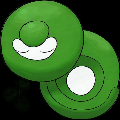

In [65]:
#顯示圖片
from google.colab.patches import cv2_imshow
cv2_imshow(test)

In [14]:
print(W1,W2)

45.151965627201655 3707.1800832978156
